# Table of Contents
 <p><div class="lev1"><a href="#ELECTION-FORECASTING-REVISITED"><span class="toc-item-num">1&nbsp;&nbsp;</span>ELECTION FORECASTING REVISITED</a></div><div class="lev2"><a href="#Problem-1.1---Drawing-a-Map-of-the-US"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem 1.1 - Drawing a Map of the US</a></div><div class="lev2"><a href="#Problem-1.2---Drawing-a-Map-of-the-US"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Problem 1.2 - Drawing a Map of the US</a></div><div class="lev1"><a href="#Problem-2---Coloring-the-States-by-Predictions"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem 2 - Coloring the States by Predictions</a></div><div class="lev2"><a href="#Problem-2.1---Coloring-the-States-by-Predictions"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Problem 2.1 - Coloring the States by Predictions</a></div><div class="lev2"><a href="#Problem-2.2---Coloring-the-States-by-Predictions"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Problem 2.2 - Coloring the States by Predictions</a></div><div class="lev2"><a href="#Problem-2.3---Coloring-the-States-by-Predictions"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Problem 2.3 - Coloring the States by Predictions</a></div><div class="lev3"><a href="#Explanation"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Explanation</a></div><div class="lev2"><a href="#Problem-2.4---Coloring-the-States-by-Predictions"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Problem 2.4 - Coloring the States by Predictions</a></div><div class="lev2"><a href="#Problem-2.5---Coloring-the-States-by-Predictions"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Problem 2.5 - Coloring the States by Predictions</a></div><div class="lev1"><a href="#Problem-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Problem 3</a></div><div class="lev2"><a href="#Problem-3.1---Understanding-the-Predictions"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Problem 3.1 - Understanding the Predictions</a></div><div class="lev2"><a href="#Problem-3.2---Understanding-the-Predictions"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Problem 3.2 - Understanding the Predictions</a></div><div class="lev1"><a href="#Problem-4---Parameters-settings"><span class="toc-item-num">4&nbsp;&nbsp;</span>Problem 4 - Parameters settings</a></div><div class="lev2"><a href="#Problem-4.2---Parameter-Settings"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Problem 4.2 - Parameter Settings</a></div>

ELECTION FORECASTING REVISITED
===============================

In the recitation from Unit 3, we used logistic regression on polling data in order to construct US presidential election predictions. We separated our data into a training set, containing data from 2004 and 2008 polls, and a test set, containing the data from 2012 polls. We then proceeded to develop a logistic regression model to forecast the 2012 US presidential election.

In this homework problem, we'll revisit our logistic regression model from Unit 3, and learn how to plot the output on a map of the United States. Unlike what we did in the Crime lecture, this time we'll be plotting predictions rather than data!

First, load the ggplot2, maps, and ggmap packages using the library function. All three packages should be installed on your computer from lecture, but if not, you may need to install them too using the install.packages function.

Then, load the US map and save it to the variable statesMap, like we did during the Crime lecture:

statesMap = map_data("state")

The maps package contains other built-in maps, including a US county map, a world map, and maps for France and Italy.

In [1]:
library(ggplot2)
library(maps)
library(ggmap)

In [2]:
statesMap = map_data("state")

## Problem 1.1 - Drawing a Map of the US

If you look at the structure of the statesMap data frame using the str function, you should see that there are 6 variables. One of the variables, group, defines the different shapes or polygons on the map. Sometimes a state may have multiple groups, for example, if it includes islands. How many different groups are there?

The variable "order" defines the order to connect the points within each group, and the variable "region" gives the name of the state.

In [3]:
str(statesMap)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


In [5]:
length(table(statesMap$group))

[1] 63

## Problem 1.2 - Drawing a Map of the US

You can draw a map of the United States by typing the following in your R console:

ggplot(statesMap, aes(x = long, y = lat, group = group)) + geom_polygon(fill = "white", color = "black")

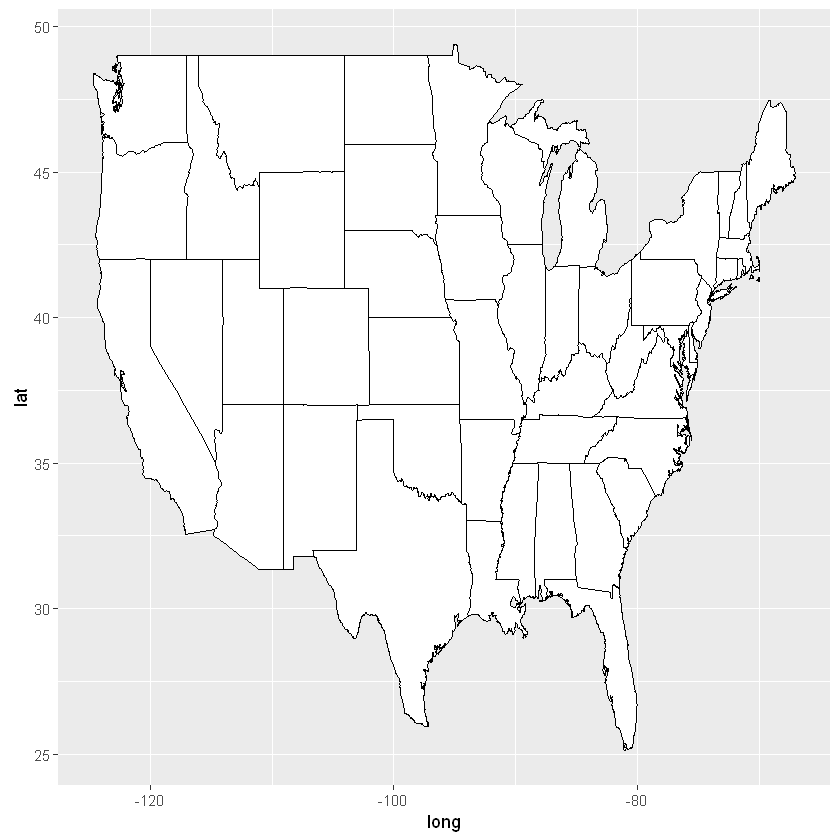

In [9]:
ggplot(statesMap, aes(x=long, y=lat, group=group)) +
geom_polygon(fill="white", color="black")

We specified two colors in geom_polygon -- fill and color. Which one defined the color of the outline of the states?

- fill
- color
- Neither ?

In our plot, the states are outlined in black, which is the color we specified for the option "color".

To confirm that this is changing the outline color of the states, we can try re-running the command with a different color:

> ggplot(statesMap, aes(x = long, y = lat, group = group)) + geom_polygon(fill = "white", color = "pink")

# Problem 2 - Coloring the States by Predictions

## Problem 2.1 - Coloring the States by Predictions

Now, let's color the map of the US according to our 2012 US presidential election predictions from the Unit 3 Recitation. We'll rebuild the model here, using the dataset PollingImputed.csv. Be sure to use this file so that you don't have to redo the imputation to fill in the missing values, like we did in the Unit 3 Recitation.

Load the data using the read.csv function, and call it "polling".

In [12]:
polling <- read.csv("PollingImputed.csv")
str(polling)

'data.frame':	145 obs. of  7 variables:
 $ State     : Factor w/ 50 levels "Alabama","Alaska",..: 1 1 2 2 3 3 3 4 4 4 ...
 $ Year      : int  2004 2008 2004 2008 2004 2008 2012 2004 2008 2012 ...
 $ Rasmussen : int  11 21 19 16 5 5 8 7 10 13 ...
 $ SurveyUSA : int  18 25 21 18 15 3 5 5 7 21 ...
 $ DiffCount : int  5 5 1 6 8 9 4 8 5 2 ...
 $ PropR     : num  1 1 1 1 1 ...
 $ Republican: int  1 1 1 1 1 1 1 1 1 1 ...


Then split the data using the subset function into a training set called "Train" that has observations from 2004 and 2008, and a testing set called "Test" that has observations from 2012.

In [14]:
Train <- subset(polling, Year == 2004 | Year == 2008)
Test <- subset(polling, Year == 2012)

In [16]:
nrow(Test)
nrow(Train)

[1] 45

[1] 100

Note that we only have 45 states in our testing set, since we are missing observations for Alaska, Delaware, Alabama, Wyoming, and Vermont, so these states will not appear colored in our map.

Then, create a logistic regression model and make predictions on the test set using the following commands:

mod2 = glm(Republican~SurveyUSA+DiffCount, data=Train, family="binomial")

TestPrediction = predict(mod2, newdata=Test, type="response")

In [17]:
mod2 = glm(Republican~SurveyUSA+DiffCount, data=Train, family="binomial")
TestPrediction = predict(mod2, newdata=Test, type="response")

TestPrediction gives the predicted probabilities for each state, but let's also create a vector of Republican/Democrat predictions by using the following command:

TestPredictionBinary = as.numeric(TestPrediction > 0.5)

In [18]:
TestPredictionBinary = as.numeric(TestPrediction > 0.5)

Now, put the predictions and state labels in a data.frame so that we can use ggplot:

predictionDataFrame = data.frame(TestPrediction, TestPredictionBinary, Test$State)

In [19]:
predictionDataFrame = data.frame(TestPrediction, TestPredictionBinary, Test$State)

To make sure everything went smoothly, answer the following questions.

- For how many states is our binary prediction 1 (for 2012), corresponding to Republican?

In [22]:
table(TestPredictionBinary)

TestPredictionBinary
 0  1 
23 22 

- What is the average predicted probability of our model (on the Test set, for 2012)?

In [24]:
mean(TestPrediction)

[1] 0.4852626

## Problem 2.2 - Coloring the States by Predictions

Now, we need to merge "predictionDataFrame" with the map data "statesMap", like we did in lecture. Before doing so, we need to convert the Test.State variable to lowercase, so that it matches the region variable in statesMap.

In [25]:
predictionDataFrame$region = tolower(predictionDataFrame$Test.State)

Now, merge the two data frames using the following command:

predictionMap = merge(statesMap, predictionDataFrame, by = "region")

In [27]:
predictionMap = merge(statesMap, predictionDataFrame, by = "region")

Lastly, we need to make sure the observations are in order so that the map is drawn properly, by typing the following:

predictionMap = predictionMap[order(predictionMap$order),]

In [28]:
predictionMap = predictionMap[order(predictionMap$order),]

- How many observations are there in predictionMap?

In [29]:
str(predictionMap)

'data.frame':	15034 obs. of  9 variables:
 $ region              : chr  "arizona" "arizona" "arizona" "arizona" ...
 $ long                : num  -115 -115 -115 -115 -115 ...
 $ lat                 : num  35 35.1 35.1 35.2 35.2 ...
 $ group               : num  2 2 2 2 2 2 2 2 2 2 ...
 $ order               : int  204 205 206 207 208 209 210 211 212 213 ...
 $ subregion           : chr  NA NA NA NA ...
 $ TestPrediction      : num  0.974 0.974 0.974 0.974 0.974 ...
 $ TestPredictionBinary: num  1 1 1 1 1 1 1 1 1 1 ...
 $ Test.State          : Factor w/ 50 levels "Alabama","Alaska",..: 3 3 3 3 3 3 3 3 3 3 ...


- How many observations are there in statesMap?

In [30]:
str(statesMap)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


## Problem 2.3 - Coloring the States by Predictions

When we merged the data in the previous problem, it caused the number of observations to change. Why? Check out the help page for merge by typing ?merge to help you answer this question.

- Merging the data just combines the two data frames like it would if we used rbind, so the number of observations increased.
- We have more observations for each state now, because some observations have the statesMap data, and some observations have the prediction data.
- Because we only make predictions for 45 states, we no longer have observations for some of the states. These observations were removed in the merging process.
- We merged the observations for which our predictions are identical.

In [31]:
?merge

### Explanation

When we merge data, it only merged the observations that exist in both data sets. So since we are merging based on the region variable, we will lose all observations that have a value of "region" that doesn't exist in both data frames. You can change this default behavior by using the all.x and all.y arguments of the merge function. For more information, look at the help page for the merge function by typing ?merge in your R console.

Because we only make predictions for 45 states, we no longer have observations for some of the states. These observations were removed in the merging process.

## Problem 2.4 - Coloring the States by Predictions

Now we are ready to color the US map with our predictions! You can color the states according to our binary predictions by typing the following in your R console:

ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPredictionBinary)) + geom_polygon(color = "black")

The states appear light blue and dark blue in this map. Which color represents a Republican prediction?

- Light blue
- Dark blue

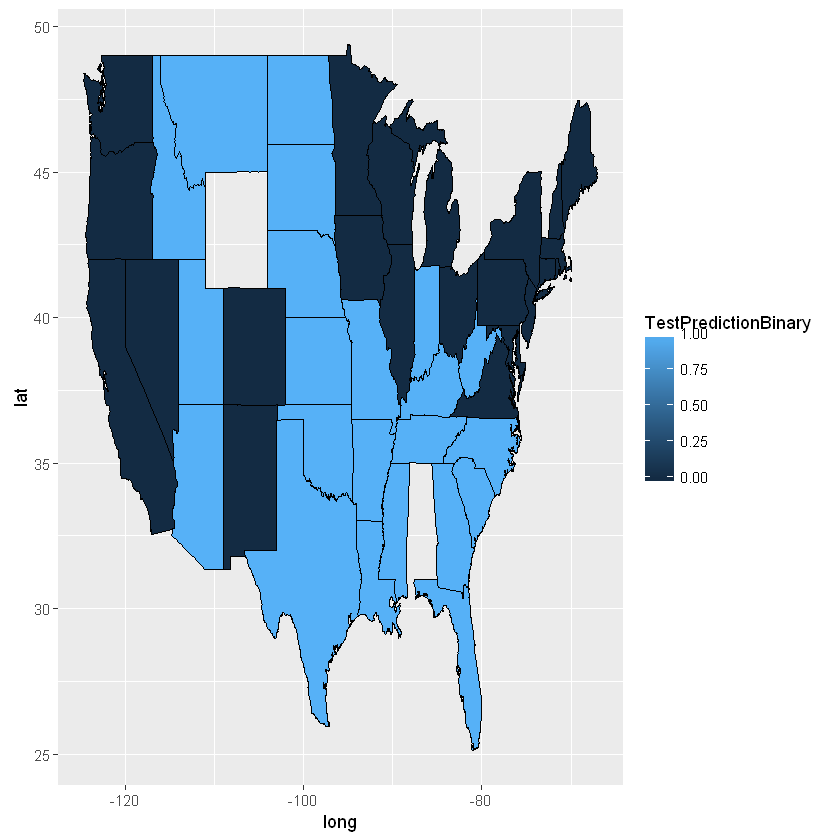

In [32]:
ggplot(predictionMap, aes(x=long, y=lat, group=group, fill=TestPredictionBinary)) +
geom_polygon(color="black")

Our logistic regression model assigned 1 to Republican and 0 to Democrat. As we can see from the legend, 1 corresponds to a light blue color on the map and 0 corresponds to a dark blue color on the map.

## Problem 2.5 - Coloring the States by Predictions

We see that the legend displays a blue gradient for outcomes between 0 and 1. However, when plotting the binary predictions there are only two possible outcomes: 0 or 1. Let's replot the map with discrete outcomes. We can also change the color scheme to blue and red, to match the blue color associated with the Democratic Party in the US and the red color associated with the Republican Party in the US. This can be done with the following command:

ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPredictionBinary))+ geom_polygon(color = "black") + scale_fill_gradient(low = "blue", high = "red", guide = "legend", breaks= c(0,1), labels = c("Democrat", "Republican"), name = "Prediction 2012")

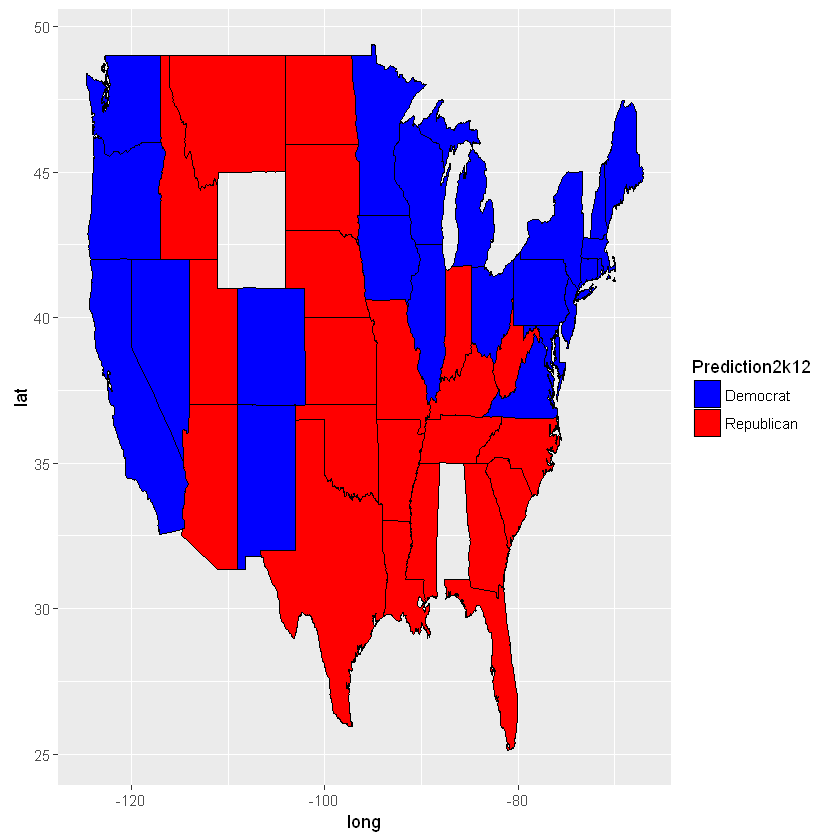

In [33]:
ggplot(predictionMap, aes(x=long, y=lat, group=group, fill=TestPredictionBinary)) +
geom_polygon(color="black") +
scale_fill_gradient(
    low="blue", high="red", guide="legend", breaks=c(0,1),
    labels=c("Democrat", "Republican"), name="Prediction2k12"
)

Alternatively, we could plot the probabilities instead of the binary predictions.

Change the plot command above to instead color the states by the variable TestPrediction. You should see a gradient of colors ranging from red to blue.

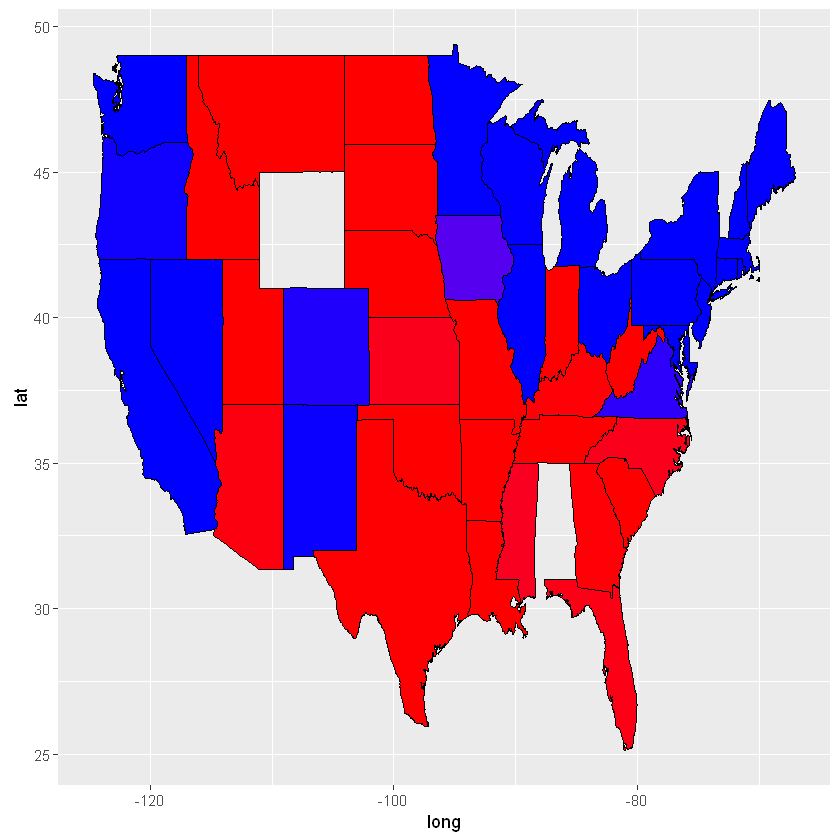

In [35]:
ggplot(predictionMap, aes(x=long, y=lat, group=group, fill=TestPrediction)) +
geom_polygon(color="black") +
scale_fill_gradient(
    low="blue", high="red", guide="legend", breaks=c(0,1),
    labels=c("Democrat", "Republican"), name="Prediction2k12"
)

Do the colors of the states in the map for TestPrediction look different from the colors of the states in the map with TestPredictionBinary? Why or why not?

NOTE: If you have a hard time seeing the red/blue gradient, feel free to change the color scheme, by changing the arguments low = "blue" and high = "red" to colors of your choice (to see all of the color options in R, type colors() in your R console). You can even change it to a gray scale, by changing the low and high colors to "gray" and "black".


- The two maps look very similar. This is because most of our predicted probabilities are close to 0 or close to 1.
- The two maps look very similar. This is because TestPrediction and TestPredictionBinary have the exact same values.
- The two maps look very different. This is because we have switched from plotting discrete values to plotting continuous values.
- The two maps look very different. This is because our predicted probabilites have a wide range of values, and we were not sure about many states.

In [37]:
head(table(TestPrediction))

TestPrediction
1.23697003202363e-07 1.25446252676014e-06  2.4296500373943e-06 
                   1                    1                    1 
2.43174763250483e-06 1.27154899595146e-05 1.77016906360533e-05 
                   1                    1                    1 

The only state that appears purple (the color between red and blue) is the state of Iowa, so the maps look very similar.

If you take a look at TestPrediction, you can see that most of our predicted probabilities are very close to 0 or very close to 1. In fact, we don't have a single predicted probability between 0.065 and 0.93.

# Problem 3

## Problem 3.1 - Understanding the Predictions

In the 2012 election, the state of Florida ended up being a very close race. It was ultimately won by the Democratic party. Did we predict this state correctly or incorrectly? To see the names and locations of the different states, take a look at the World Atlas map [here](http://www.worldatlas.com/webimage/testmaps/usanames.htm).


- We correctly predicted that this state would be won by the Democratic party.
- We incorrectly predicted this state by predicting that it would be won by the Republican party.

In our prediction map, the state of Florida is colored red, meaning that we predicted Republican. So we incorrectly predicted this state.

## Problem 3.2 - Understanding the Predictions

What was our predicted probability for the state of Florida?

In [56]:
predictionDataFrame[predictionDataFrame$region == "florida",]

,TestPrediction,TestPredictionBinary,Test.State,region
24,0.964039495344072,1,Florida,florida


What does this imply?

- Our prediction model did a good job of correctly predicting the state of Florida, and we were very confident in our prediction.
- Our prediction model did a good job of correctly predicting the state of Florida, but we were not very confident in the prediction.
- Our prediction model did not do a very good job of correctly predicting the state of Florida, but we were not very confident in our prediction.
- Our prediction model did not do a very good job of correctly predicting the state of Florida, and we were very confident in our incorrect prediction. 

We predicted Republican for the state of Florida with high probability, meaning that we were very confident in our incorrect prediction!

Historically, Florida is usually a close race, but our model doesn't know this. The model only uses polling results for the particular year.

For Florida in 2012, Survey USA predicted a tie, but other polls predicted Republican, so our model predicted Republican.

$\Rightarrow$ Our prediction model did not do a very good job of correctly predicting the state of Florida, and we were very confident in our incorrect prediction.

# Problem 4 - Parameters settings

In this part, we'll explore what the different parameter settings of geom_polygon do.

Throughout the problem, use the help page for geom_polygon, which can be accessed by ?geom_polygon.

To see more information about a certain parameter, just type a question mark and then the parameter name to get the help page for that parameter. Experiment with different parameter settings to try and replicate the plots!

In [58]:
?geom_polygon

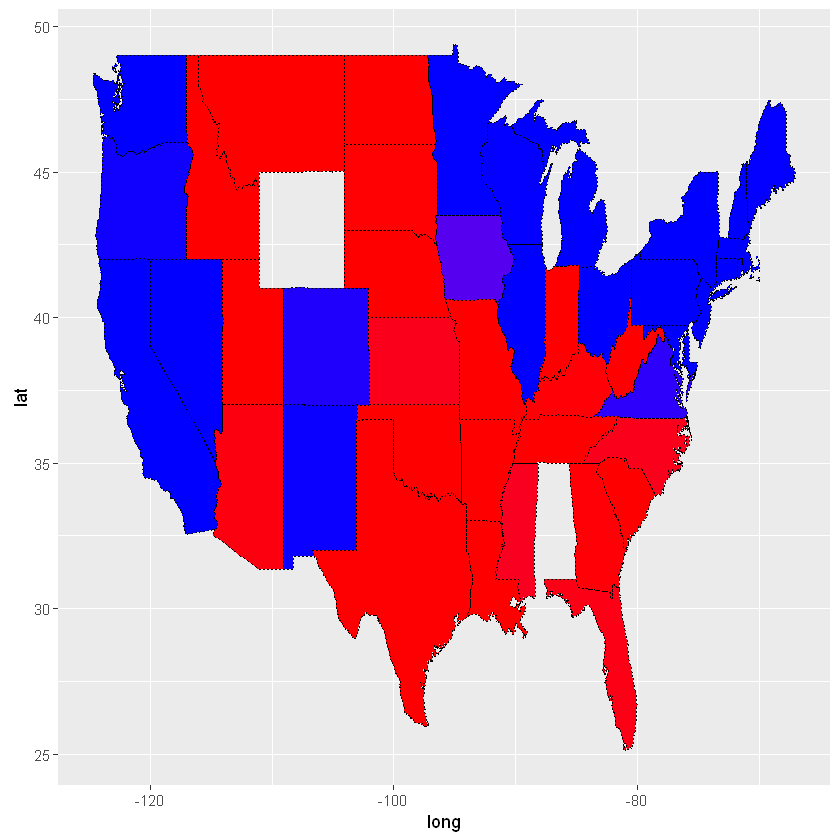

In [59]:
ggplot(predictionMap, aes(x=long, y=lat, group=group, fill=TestPrediction)) +
geom_polygon(color="black", linetype=3) +
scale_fill_gradient(
    low="blue", high="red", guide="legend", breaks=c(0,1),
    labels=c("Democrat", "Republican"), name="Prediction2k12"
)

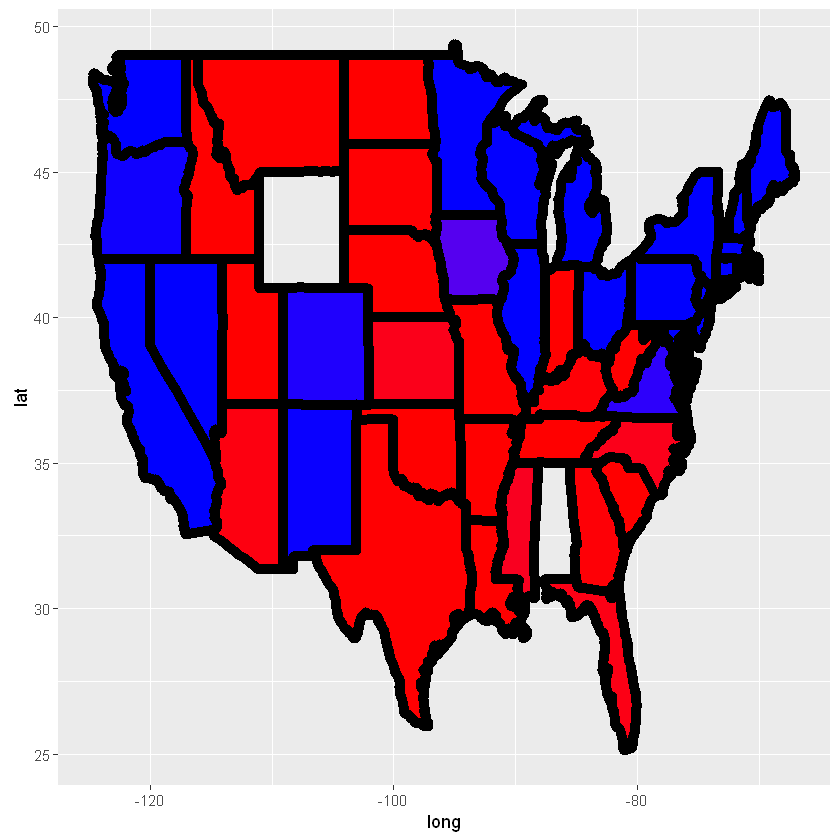

In [60]:
ggplot(predictionMap, aes(x=long, y=lat, group=group, fill=TestPrediction)) +
geom_polygon(color="black", size=3) +
scale_fill_gradient(
    low="blue", high="red", guide="legend", breaks=c(0,1),
    labels=c("Democrat", "Republican"), name="Prediction2k12"
)

- The first plot can be generated by setting the parameter linetype = 3:
> ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPrediction)) +
geom_polygon(color = "black", linetype=3) +
scale_fill_gradient(
    low = "blue", high = "red", guide = "legend", breaks= c(0,1), 
    labels = c("Democrat", "Republican"), name = "Prediction 2012"
)

- The second plot can be generated by setting the parameter size = 3:
> ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPrediction))+ geom_polygon(color = "black", size=3) + scale_fill_gradient(low = "blue", high = "red", guide = "legend", breaks= c(0,1), labels = c("Democrat", "Republican"), name = "Prediction 2012")

## Problem 4.2 - Parameter Settings

Plot (3) was created by changing the value of a different geom_polygon parameter to have value 0.3. Which parameter did we use?

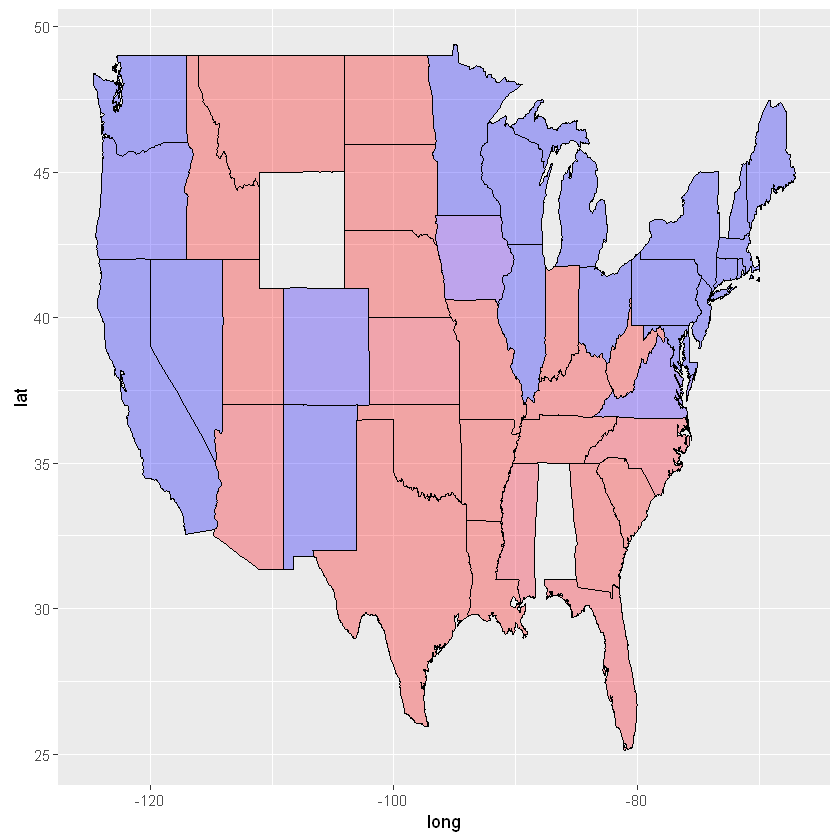

In [61]:
ggplot(predictionMap, aes(x=long, y=lat, group=group, fill=TestPrediction)) +
geom_polygon(color="black", alpha=.3) +
scale_fill_gradient(
    low="blue", high="red", guide="legend", breaks=c(0,1),
    labels=c("Democrat", "Republican"), name="Prediction2k12"
)

- Plot (3) can be created by changing the alpha parameter:

> ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPrediction))+ geom_polygon(color = "black", alpha=0.3) + scale_fill_gradient(low = "blue", high = "red", guide = "legend", breaks= c(0,1), labels = c("Democrat", "Republican"), name = "Prediction 2012")

The "alpha" parameter controls the transparency or darkness of the color. A smaller value of alpha will make the colors lighter.